<a href="https://colab.research.google.com/github/salexey1990/gb/blob/master/ml-business/hw01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1

а. зависимость цены на недвижимость в конкретном регионе от времени будет являться временным рядом. Поскольку значения сильно связаны с соседними

б. скорость полета самолета при перелете из аэропорта А в аэропорт В тоже временной ряд, поскольку значения связаны между собой по времени

в. количество отказов компьютера не временной ряд, поскольку количество отказов в данный час не связано с количеством отказов в прошлом часу

г. число обращений в поликлинику по району не времянной ряд так же как и в ответе в.

д. координаты автобуса при движении по маршруту так же не являются числовым рядом, поскольку координаты это не численная величина

е. координаты фигуры нарушителя в файле видеофиксации охранной системы аналогично случаю д

# 2

In [0]:
from google.colab import files
import io

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [5]:

uploaded = files.upload()

Saving DUQ_hourly.csv to DUQ_hourly.csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['DUQ_hourly.csv']), index_col=[0], parse_dates=[0])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [0]:
df.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [0]:
df['DUQ_MW'].isnull().sum()

0

Мы имеем 119068 строк в нашем датасете. Они все не нулевые и включают в себя datetime индекс с периодичностью в один час, начиная с 2005-12-31 01:00:00 to 2018-01-02 00:00:00, и значение потребления электроэнергии на заданный час. Построим график, чтобы понять как наши данные выглядят

Text(0, 0.5, 'МВт')

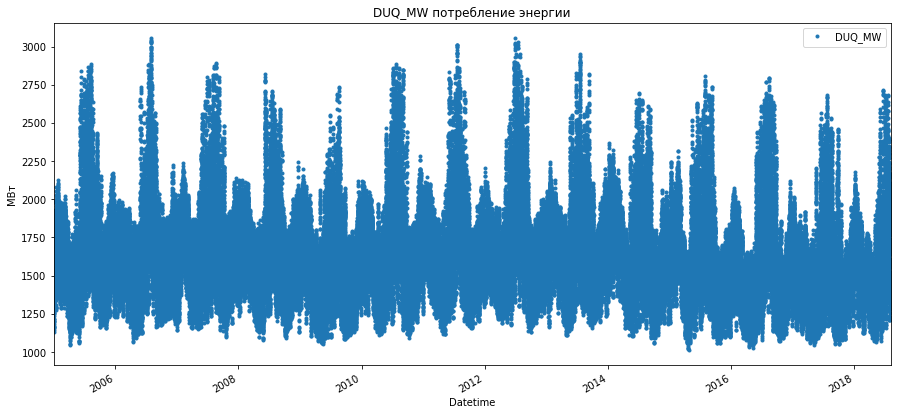

In [0]:
df.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW потребление энергии' )
plt.ylabel ( 'МВт' )

Визуально данные имеют ярко выраженную цикличность, и не имеют никаких провалов

In [0]:
df['date'] = df.index

In [0]:
df.head()

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458.0,2005-12-31 01:00:00
2005-12-31 02:00:00,1377.0,2005-12-31 02:00:00
2005-12-31 03:00:00,1351.0,2005-12-31 03:00:00
2005-12-31 04:00:00,1336.0,2005-12-31 04:00:00
2005-12-31 05:00:00,1356.0,2005-12-31 05:00:00


Проверим все ли значения в датасете уникальны

In [0]:
ut = df['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', df.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [0]:
count_data = df['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

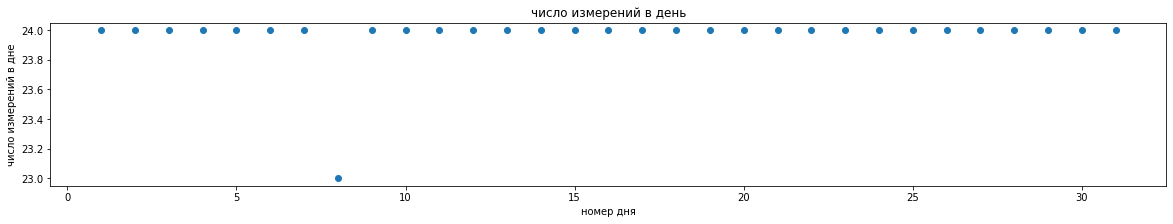

In [8]:
day_H=df['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

Поскольку имеется дублирование индексов времени в ноябре и недостаток индексов в марте из года в год, можем сделать вывод, что имело место переход на зимнее и летнее время

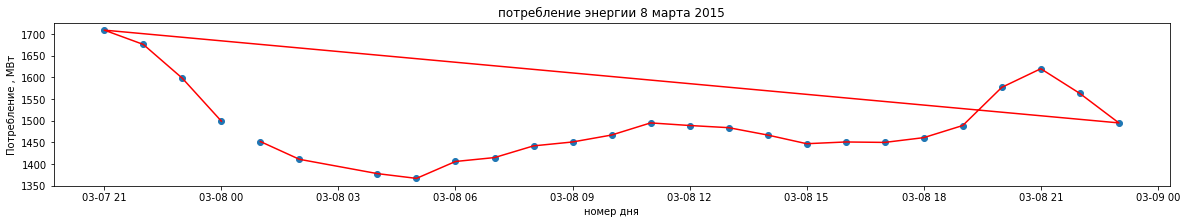

In [12]:
plt.figure(figsize=(20,3))
plt.plot(df['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,df['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(df['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,df['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'r')
line_ = pd.to_datetime(pd.Series(['2015-03-08 03:00:00', '2015-03-08 03:00:00']))

plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии 8 марта 2015')

plt.show()

На данном графике виден разрыв, обозначающий переход на летнее время, а так же особенность датасета, заключающаяся в том, что не соблюдён понядок времени, а именно 2015-03-07 00:00:00 следует за 2015-03-07 23:00:00

# 3

In [14]:
uploaded = files.upload()

Saving нефть-brent 2010-2019.xlsx to нефть-brent 2010-2019.xlsx


In [0]:
df_daily = pd.read_excel(io.BytesIO(uploaded['нефть-brent 2010-2019.xlsx']), index_col=[0], parse_dates=[0])

In [18]:
df_daily.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [20]:
df_monthly = df_daily.copy()
df_monthly = df_monthly.resample("M").mean()
df_monthly.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


In [21]:
df_weekly = df_daily.copy()
df_weekly = df_weekly.resample("W").mean()
df_weekly.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


Text(0.5, 0, 't')

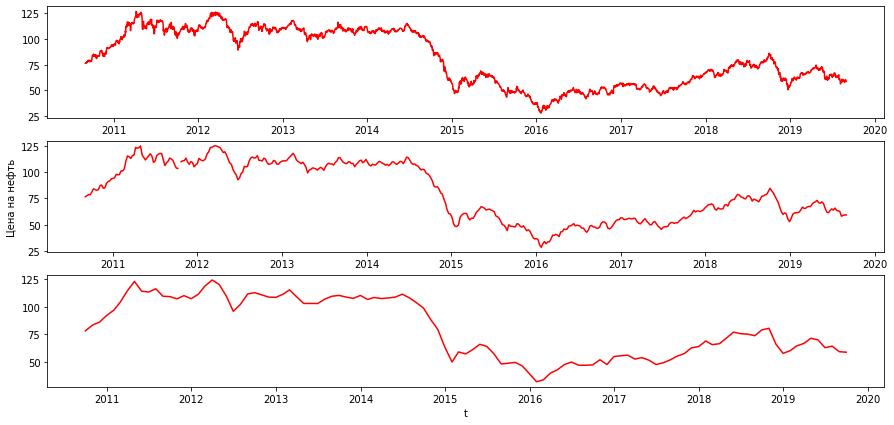

In [24]:
plt.figure(figsize=(15,7))
plt.subplot(3,1,1)
plt.plot(df_daily.index,df_daily.values, 'r')

plt.subplot(3,1,2)
plt.plot(df_weekly.index,df_weekly.values, 'r')
plt.ylabel('Цена на нефть')

plt.subplot(3,1,3)
plt.plot(df_monthly.index,df_monthly.values, 'r')
plt.xlabel('t')

Как видно из графиков, хотя общий тренд изменения цены нефти сохраняется, теряются многое детали. Построим графики изменения среднего значения и дисперсии в зависимости от типе семплирования

In [0]:
means = list([df_daily.mean(), df_weekly.mean(), df_monthly.mean()])
stds = list([df_daily.std(), df_weekly.std(), df_monthly.std()])

Text(0, 0.5, 'Дисперсия цены на нефть')

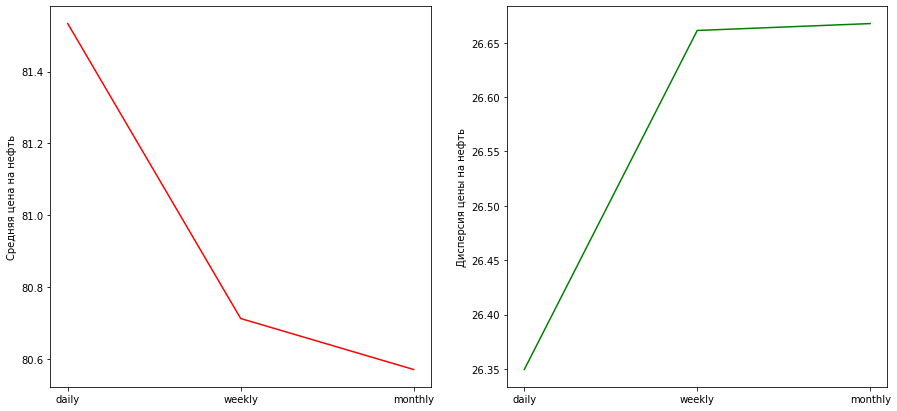

In [31]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(['daily', 'weekly', 'monthly'],means, 'r')
plt.ylabel('Средняя цена на нефть')

plt.subplot(1,2,2)
plt.plot(['daily', 'weekly', 'monthly'],stds, 'g')
plt.ylabel('Дисперсия цены на нефть')

Как видно из приведённых выше графиках тип семплирования оказывает значительное влияние на такие статистические показатели как среднее и дисперсия. При этом чем больше интервалы семплирования тем среднее выборочное меньше, а дисперсия наоборот становится выше